In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import davies_bouldin_score

In [2]:
df=pd.read_excel("data_luasPanen.xls", header=2)   #import data excel 
df.head(5)
# df

,Jenis Tanaman\nKind of Plants,2017,2018,2019,2020
0,Bawang Daun/ Scallion,7686,9255,11852,13199
1,Bawang Merah/ Shallots,37157,41506,42962,47483
2,Bawang Putih/ Garlic,97,717,1235,1243
3,Bayam/ Spinach,2051,2180,2551,2438
4,Buncis/ string bean,1743,2415,1916,1804


In [3]:
# drop digunakan untuk memotong data kolom
df.drop('Jenis Tanaman\nKind of Plants', axis=1, inplace=True)
df.head(5)

,2017,2018,2019,2020
0,7686,9255,11852,13199
1,37157,41506,42962,47483
2,97,717,1235,1243
3,2051,2180,2551,2438
4,1743,2415,1916,1804


In [4]:
#Normalisasi data (MinMaxScaler)
from sklearn import preprocessing

minmax_scaler=preprocessing.MinMaxScaler()      #default minmaxscaler  untuk min=0 max=1
normalisasi=minmax_scaler.fit_transform(df)         #mentransformasi data df
normalisasi

array([[1.12115759e-01, 1.30907439e-01, 1.74637617e-01, 1.67373635e-01],
       [5.43299829e-01, 5.88615140e-01, 6.33852921e-01, 6.02781306e-01],
       [1.08267861e-03, 9.73574409e-03, 1.79198772e-02, 1.55321311e-02],
       [2.96712461e-02, 3.04987085e-02, 3.73453783e-02, 3.07086614e-02],
       [2.51649622e-02, 3.38338395e-02, 2.79721312e-02, 2.26568453e-02],
       [1.99724941e-01, 1.73966109e-01, 1.79626841e-01, 1.53136906e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.31677128e-03, 4.39953450e-04, 5.01874649e-04, 3.81000762e-04],
       [3.01394314e-03, 4.81110386e-03, 6.25867210e-03, 3.73380747e-03],
       [6.99790780e-02, 6.60072096e-02, 7.25651699e-02, 5.99060198e-02],
       [4.82230903e-02, 5.13468252e-02, 5.95164290e-02, 7.58318517e-02],
       [1.65035333e-02, 2.01101303e-02, 2.71307531e-02, 3.43154686e-02],
       [1.75657288e-01, 1.89591553e-01, 1.86712131e-01, 1.96329693e-01],
       [3.66940262e-02, 3.78359967e-02, 4.11980043e

In [13]:
kmeans = KMeans(n_clusters = 3, random_state=0, init="random")
kmeans.fit(normalisasi)
kmeans.labels_

array([1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [14]:
predict =kmeans.predict(normalisasi)
predict

array([1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [15]:
df['cluster']=predict
df.head(7)

,2017,2018,2019,2020,cluster
0,7686,9255,11852,13199,1
1,37157,41506,42962,47483,2
2,97,717,1235,1243,1
3,2051,2180,2551,2438,1
4,1743,2415,1916,1804,1
5,13674,12289,12190,12078,1
6,68372,70493,67767,78760,0


In [16]:
db_index = davies_bouldin_score(df, predict)
print(db_index)

0.07714051025494487


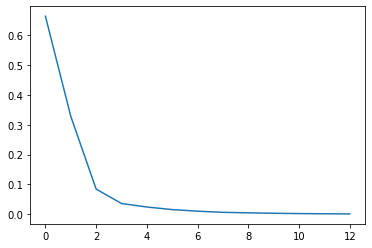

In [17]:
#elbow-curve
ssd = []
K = range (2,15)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(normalisasi)
    ssd.append(kmeans.inertia_)
#plot SSDs untuk setiap n_clusters
plt.plot(ssd)
#print (ssd)

In [21]:
from sklearn.metrics import silhouette_score
K = range (2,15)
for num_clusters in K:
    
    #inisalisai kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(normalisasi)
    kluster = kmeans.labels_
    
    #silhouette score
    silhouette_rata2 = silhouette_score(normalisasi, kluster)
    print ("for n_clusters={0}, the silhouette score is {1}".format (num_clusters,  silhouette_rata2))

for n_clusters=2, the silhouette score is 0.8669676817390768
for n_clusters=3, the silhouette score is 0.8008633776882547
for n_clusters=4, the silhouette score is 0.6181979633242622
for n_clusters=5, the silhouette score is 0.5330643345669531
for n_clusters=6, the silhouette score is 0.47219474463368866
for n_clusters=7, the silhouette score is 0.5236304417482012
for n_clusters=8, the silhouette score is 0.49850857157586975
for n_clusters=9, the silhouette score is 0.48791361269991707
for n_clusters=10, the silhouette score is 0.4680059603099774
for n_clusters=11, the silhouette score is 0.42748767349026157
for n_clusters=12, the silhouette score is 0.4215053004580839
for n_clusters=13, the silhouette score is 0.3441789334162659
for n_clusters=14, the silhouette score is 0.29335632726882843
